In [1]:
# %load_ext nb_black
%load_ext autoreload
%autoreload 2

## Initialization

### Imports

In [2]:
import os
import sys
import cv2
import json
import torch
import zipfile
import numpy as np
import pandas as pd
import plotly.express as px

from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

sys.path.append("../code/")

In [3]:
from params import *

from inference.main import k_fold_inf

from data.dataset import InferenceDataset
from data.transforms import HE_preprocess

### Load

In [4]:
df_info = pd.read_csv(DATA_PATH + f"HuBMAP-20-dataset_information.csv")
df_mask = pd.read_csv(DATA_PATH + "train.csv")
df = pd.read_csv(OUT_PATH + "df_images.csv")

### Data

In [5]:
root = TIFF_PATH_4
rle_path = DATA_PATH + "train_4.csv"
reduce_factor = 1
rles = pd.read_csv(rle_path)

In [6]:
img = "2f6ecfcdf" # "aaa6a05cc"

In [7]:
dataset = InferenceDataset(
    f"{root}/{img}.tiff",
    rle=rles[rles['id'] == img]["encoding"],
    overlap_factor=2,
    reduce_factor=reduce_factor,
    transforms=HE_preprocess(augment=False, visualize=True),
)

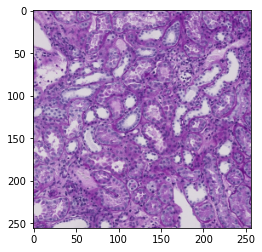

In [8]:
img, pos = dataset[1000]

plt.imshow(img.numpy().transpose(1, 2, 0))

### Inference

In [9]:
# log_folder = "../logs/2020-12-21/3/"  # se_resnext50
# log_folder = "../logs/2020-12-22/9/"  # b4
log_folder = "../logs/2020-12-22/10/"  # b5 
log_folder = "../logs/2020-12-28/17/"  # b5  (BEST)
# log_folder = "../logs/2020-12-23/2/"  # b6

log_folder = "../logs/2021-03-18/0/"  # b5 new

In [10]:
class Config:
    def __init__(self, **entries):
        self.__dict__.update(entries)

config = json.load(open(log_folder + 'config.json', 'r'))
config = Config(**config)

In [11]:
global_threshold = 0.4

In [ ]:
%%time
scores = k_fold_inf(
    config,
    df,
    log_folder=log_folder,
    use_full_size=True,
    global_threshold=global_threshold,
    use_tta=False,
)


-------------   Fold 1 / 5  -------------


 -> Loading weights from ../logs/2021-03-18/0/Unet_efficientnet-b5_0.pt


    -> Validating 

 - Scored 0.9512 for image 2f6ecfcdf with threshold 0.40

 - Scored 0.9530 for image b2dc8411c with threshold 0.40

 - Scored 0.9373 for image 4ef6695ce with threshold 0.40


-------------   Fold 2 / 5  -------------


 -> Loading weights from ../logs/2021-03-18/0/Unet_efficientnet-b5_1.pt


    -> Validating 

 - Scored 0.9577 for image 8242609fa with threshold 0.40

 - Scored 0.9426 for image 0486052bb with threshold 0.40

 - Scored 0.9514 for image 26dc41664 with threshold 0.40


-------------   Fold 3 / 5  -------------


 -> Loading weights from ../logs/2021-03-18/0/Unet_efficientnet-b5_2.pt


    -> Validating 

 - Scored 0.9056 for image aaa6a05cc with threshold 0.40

 - Scored 0.9445 for image e79de561c with threshold 0.40



In [ ]:
print(f'Local CV score is {np.mean(scores):.4f} for threshold {global_threshold}')

In [13]:
%%time
scores = k_fold_inf(
    config,
    df,
    log_folder=log_folder,
    use_full_size=False,
    global_threshold=global_threshold,
    use_tta=False,
)


-------------   Fold 1 / 5  -------------


 -> Loading weights from ../logs/2021-03-18/0/Unet_efficientnet-b5_0.pt


    -> Validating 

 - Scored 0.9500 for image 2f6ecfcdf with threshold 0.35
 - Scored 0.9513 for image 2f6ecfcdf with threshold 0.40 after resizing

 - Scored 0.9531 for image b2dc8411c with threshold 0.35
 - Scored 0.9535 for image b2dc8411c with threshold 0.40 after resizing

 - Scored 0.9357 for image 4ef6695ce with threshold 0.40
 - Scored 0.9374 for image 4ef6695ce with threshold 0.40 after resizing

CPU times: user 3min 46s, sys: 2.62 s, total: 3min 48s
Wall time: 1min 25s
